# Decision Trees and Random Forests Project

> Dataset: `loan_data.csv`
> * credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
> * purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
> * int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
> * installment: The monthly installments owed by the borrower if the loan is funded.
> * log.annual.inc: The natural log of the self-reported annual income of the borrower.
> * dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
> * fico: The FICO credit score of the borrower.
> * days.with.cr.line: The number of days the borrower has had a credit line.
> * revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
> * revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
> * inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
> * delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
> * pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

This project will use a data set containing data of people who did loan of money (borrowers) through [LendingClub](https://www.lendingclub.com/) [[Wikipedia](https://en.wikipedia.org/wiki/LendingClub)]. We will use decision trees and random forest machine learning models to classify and predict whether or not the borrower paid back their loan in full.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the Data

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Check out the info() of the data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Call describe() on the data frame
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

**Create a histogram of two `fico` distributions on top of each other, one for each `credit.policy` outcome**

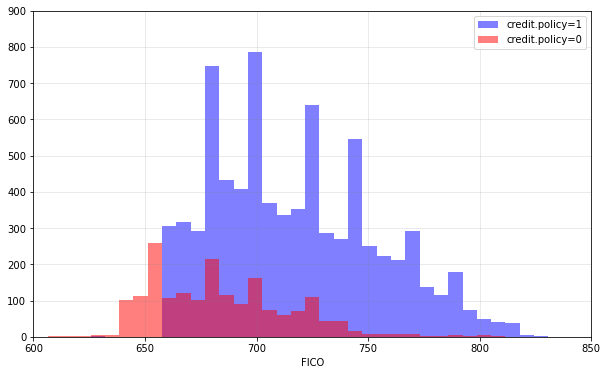

In [5]:
plt.figure(figsize=(10, 6))
plt.grid(color='gray', alpha=0.2)

bins = np.linspace(600, 850, num=40)

plt.hist(
    loans[loans['credit.policy'] == 1]['fico'],
    bins,
    alpha=0.5,
    label='credit.policy=1',
    color='blue'
)
plt.hist(
    loans[loans['credit.policy'] == 0]['fico'],
    bins,
    alpha=0.5,
    label='credit.policy=0',
    color='red'
)

plt.xlabel('FICO')
plt.xlim((600, 850))
plt.ylim((0, 900))
plt.legend()

**Create a histogram of two `fico` distributions on top of each other, one for each value of `not.fully.paid` column**

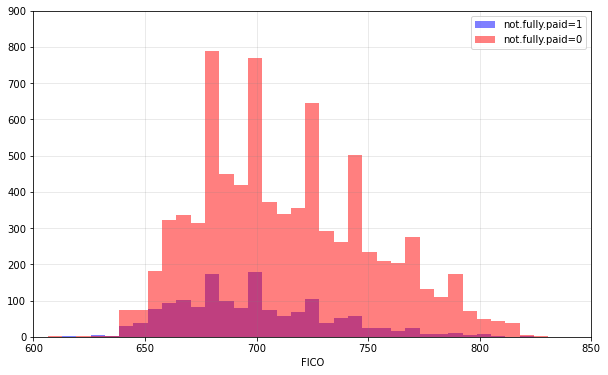

In [6]:
plt.figure(figsize=(10, 6))
plt.grid(color='gray', alpha=0.2)

bins = np.linspace(600, 850, num=40)

plt.hist(
    loans[loans['not.fully.paid'] == 1]['fico'],
    bins,
    alpha=0.5,
    label='not.fully.paid=1',
    color='blue'
)
plt.hist(
    loans[loans['not.fully.paid'] == 0]['fico'],
    bins,
    alpha=0.5,
    label='not.fully.paid=0',
    color='red'
)

plt.xlabel('FICO')
plt.xlim((600, 850))
plt.ylim((0, 900))
plt.legend()

**Create a countplot using seaborn showing the counts of loans by `purpose`, with the color hue defined by `not.fully.paid`**

<AxesSubplot:xlabel='purpose', ylabel='count'>

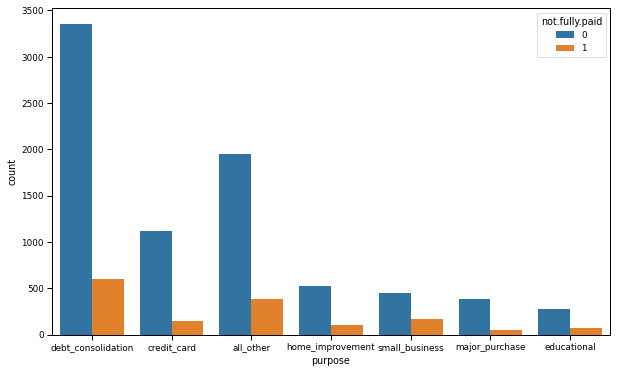

In [7]:
plt.figure(figsize=(10, 6))
sns.set_context("paper", rc={"font.size": 1})
sns.countplot(
    data=loans,
    x='purpose',
    hue='not.fully.paid',
)

**Create a jointplot using seaborn to show the trend between `fico` score and interest rate `int.rate`**

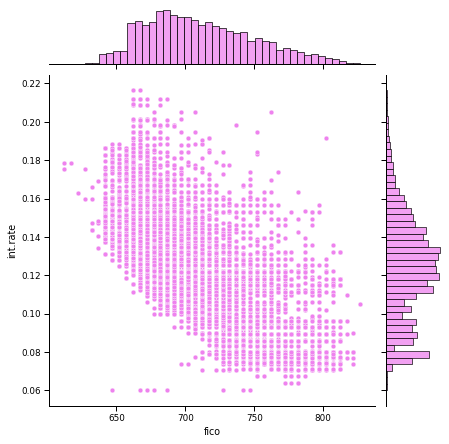

In [8]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='violet')

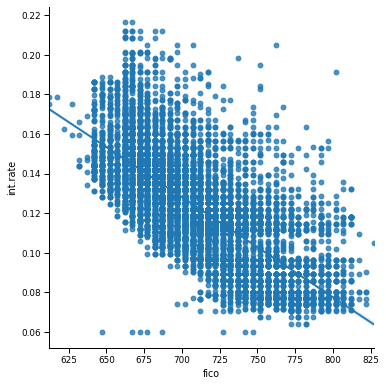

In [9]:
sns.lmplot(data=loans, x='fico', y='int.rate')

**Create two [lmplots](https://seaborn.pydata.org/generated/seaborn.lmplot.html) using seaborn to see if the trend differed between `not.fully.paid` and `credit.policy`**

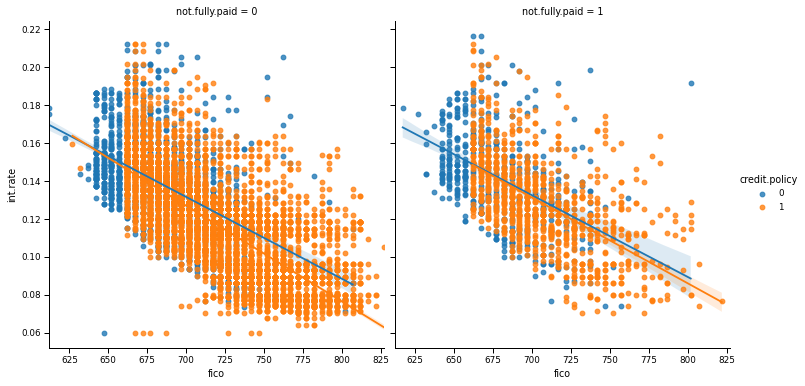

In [10]:
sns.lmplot(
    data=loans,
    x='fico',
    y='int.rate',
    col='not.fully.paid',
    hue='credit.policy'
)

## Setting up the Data

In [11]:
# Check data info() again
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Categorical Features

Notice that the `purpose` column contain categorical values. That means we need to transform them using `dummy variables` so that `sklearn` will be able to understand them. Let's do this in one clean step using `Pandas` `pd.get_dummies`. Let's convert categorical variable `purpose` to numerical ones in a way that can be expanded to multiple categorical features if necessary.

In [13]:
# Create a list of elements containing categorical features' names
# and call this list cat_feats. In our example here, there is only
# one categorical feature - `purpose`
cat_feats = ['purpose']

In [14]:
# Now use pd.get_dummies(data_frame, columns=cat_feats, drop_first=True)
# to create a fixed larger DataFrame that has new feature columns with
# dummy variables. Set this DataFrame as final_data
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [15]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Trainig a Decision Tree Model

Let's start by training a single decision tree first!

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Create an instance of DecisionTreeClassifier called dtree
dtree = DecisionTreeClassifier()

In [20]:
# Fit the newly created decision tree to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree Model

In [21]:
# Create predictions from the test set
predictions = dtree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874



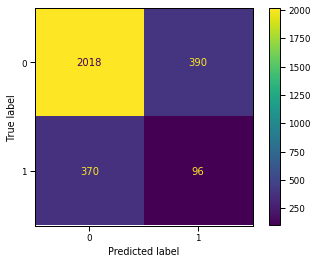

In [23]:
# Print out a classification report and plot out a confusion matrix
print(classification_report(y_test, predictions))
sns.set_context("paper", rc={"font.size": 10}) # Set font size back to 10
plot_confusion_matrix(dtree, X_test, y_test);

## Training a Random Forest Model

Now, let's move on training a random forest model!

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [26]:
# Fit the newly created random forest classifier model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Predictions and Evaluation of Random Forest Model

In [27]:
# Predict off the target values for the X_test data
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.26      0.01      0.02       466

    accuracy                           0.83      2874
   macro avg       0.55      0.50      0.47      2874
weighted avg       0.75      0.83      0.77      2874



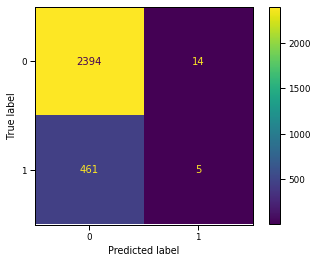

In [28]:
# Print out a classification report and plot out a confusion matrix
print(classification_report(y_test, rfc_predictions))
plot_confusion_matrix(rfc, X_test, y_test);